# <center>Regularization</center>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
boston = load_boston()

### Database information:

In [2]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


### Database splitting and validation:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=161)

In [6]:
print(bos.shape[0])
print(float(X_train.shape[0]) / float(bos.shape[0]))
print(float(X_test.shape[0]) / float(bos.shape[0]))

506
0.7984189723320159
0.2015810276679842


## Linear regression

Creating, fitting and performing a prediction using a linear regression model:

In [7]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

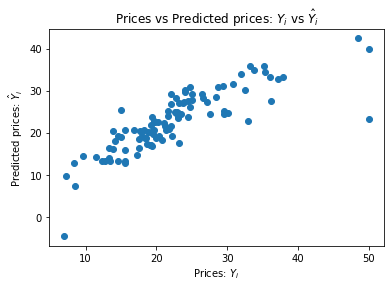

In [8]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [9]:
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Residual sum of squares: 21.03361641183322


In [10]:
score = regr.score(X_test, y_test)
print("Model score: {}".format(score))

Model score: 0.69199807414657


As the model is not accurate, the data needs to be normalised. Second degree polynomial will be used for predictions.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('regression', LinearRegression())])
pipe.fit(X_train, y_train)
Y_pred = pipe.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

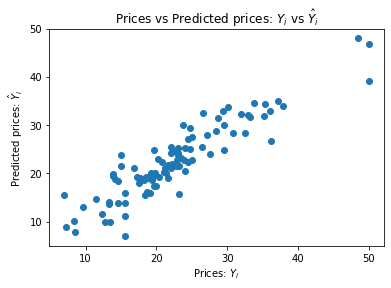

In [12]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [13]:
error = np.mean((pipe.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Residual sum of squares: 11.099643400790645


In [14]:
score = pipe.score(X_test, y_test)
print("Model score: {}".format(score))

Model score: 0.8374643961935849


### Data regularisation with L1 norm

In [15]:
from sklearn.linear_model import Lasso
scores = []
alphas = np.logspace(-4, 1, num=30)
for testedAlpha in alphas:
    clf = Lasso(alpha = testedAlpha)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

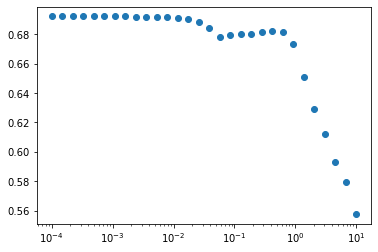

In [16]:
plt.scatter(alphas, scores)
plt.xscale('log')

Data regularisation with L2 norm

In [17]:
from sklearn.linear_model import Ridge
scores = []
alphas = np.logspace(-5, 5, num=30)
for testedAlpha in alphas:
    rlf = Ridge(alpha = testedAlpha)
    rlf.fit(X_train, y_train)
    scores.append(rlf.score(X_test, y_test))

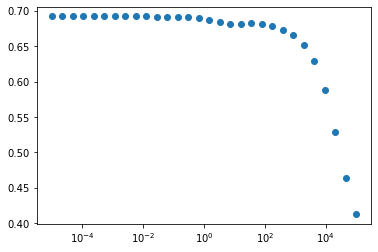

In [18]:
plt.scatter(alphas, scores)
plt.xscale('log')

## Regularisation for logistic regression

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()

In [20]:
pd.isnull(cancer)


False

The database does not contain any missing values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=161)

L1 regularisation for C=1

In [22]:
clf = LogisticRegression(penalty='l1', solver='liblinear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9298245614035088

In [23]:
scores = []
alphas = np.logspace(-4, 1, num=10)
for testedAlpha in alphas:
    clf = LogisticRegression(penalty='l2', solver='liblinear', C=testedAlpha).fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

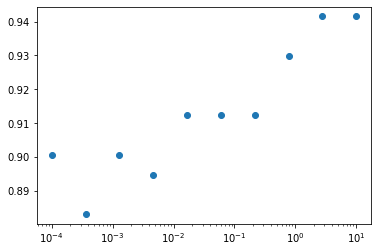

In [24]:
plt.scatter(alphas, scores)
plt.xscale('log')

K Nearest Neighbors method

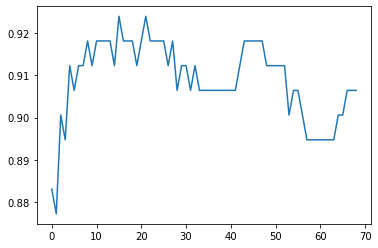

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
changesInK = []
for i in range (1, 70):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    changesInK.append(accuracy_score(y_test, neigh.predict(X_test)))
plot = plt.plot(changesInK)

The optimal value for k is between 15 and 20.

### Decision tree method

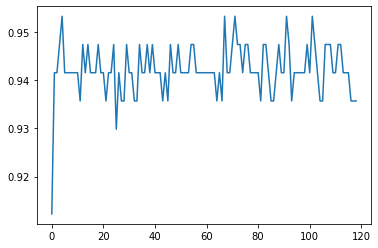

In [26]:
from sklearn import tree
changesInK = []
for i in range (1, 120):
    clf = tree.DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    changesInK.append(accuracy_score(y_test, clf.predict(X_test)))
plot = plt.plot(changesInK)

Optimal tree depth is hard to choose, but the best results are displayed in range from 10 to 20.